<a href="https://colab.research.google.com/github/Hansh-1484519/customer-segmentation/blob/main/clustering_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #for perforforming mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd #for handling and clining the dataset
import seaborn as sns #for visualization
import sklearn # for model evaluation and development

In [ ]:
#Start by connecting gdrive into the google colab

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import the dataset
dataset = pd.read_excel('/content/gdrive/MyDrive/sales_data/sales_data_sample.xlsx')
dataset.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
#numerical/statistical analysis of the dataset
dataset.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [ ]:
#dimensions of dataset
print('There are ', dataset.shape[0],'rows and',dataset.shape[1],'columns in the dataset.')

There are  2823 rows and 24 columns in the dataset.


In [ ]:
#check if the dataset has repeated values or not
print('There are',dataset.duplicated().sum(),'duplicate values in the dataset')

There are 0 duplicate values in the dataset


In [ ]:
#check for null values
dataset.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

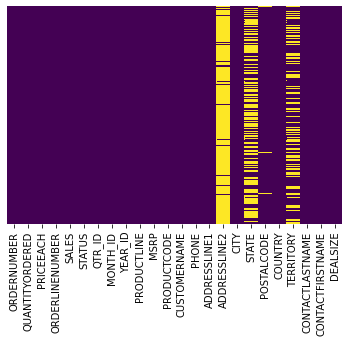

In [ ]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
dataset.drop('ADDRESSLINE2', axis = 1, inplace = True)
dataset.drop('STATE', axis = 1, inplace = True)
dataset.drop('TERRITORY', axis = 1, inplace = True)


In [ ]:
dataset.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,...,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,Brown,Julie,Medium


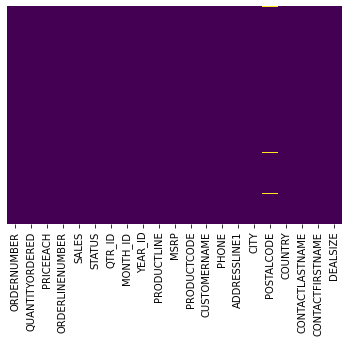

In [ ]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Schema of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  PHONE             2823 non-null   object 
 14  ADDRESSLINE1      2823 non-null   object 
 15  CITY              2823 non-null   object 
 16  POSTALCODE        2747 non-null   object 


In [ ]:
#stablish correlation between the data
c = dataset.corr()
c

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
ORDERNUMBER,1.000000,0.065543,-0.002935,-0.055550,0.039919,-0.051383,-0.039723,0.904596,-0.010280
QUANTITYORDERED,0.065543,1.000000,0.005564,-0.018397,0.551426,-0.035323,-0.039048,0.069535,0.017881
PRICEEACH,-0.002935,0.005564,1.000000,-0.020965,0.657841,0.008712,0.005152,-0.005938,0.670625
ORDERLINENUMBER,-0.055550,-0.018397,-0.020965,1.000000,-0.058400,0.040716,0.034016,-0.057367,-0.021067
SALES,0.039919,0.551426,0.657841,-0.058400,1.000000,-0.006796,-0.009605,0.035647,0.635239
QTR_ID,-0.051383,-0.035323,0.008712,0.040716,-0.006796,1.000000,0.979300,-0.433052,0.010234
MONTH_ID,-0.039723,-0.039048,0.005152,0.034016,-0.009605,0.979300,1.000000,-0.430163,0.008170
YEAR_ID,0.904596,0.069535,-0.005938,-0.057367,0.035647,-0.433052,-0.430163,1.000000,-0.014310
MSRP,-0.010280,0.017881,0.670625,-0.021067,0.635239,0.010234,0.008170,-0.014310,1.000000


In [ ]:
dataset.drop('ORDERNUMBER', axis = 1, inplace = True)
dataset.drop('ORDERLINENUMBER', axis = 1, inplace = True)
dataset.drop('STATUS', axis = 1, inplace = True)
dataset.drop('PHONE', axis = 1, inplace = True)
dataset.drop('ADDRESSLINE1', axis = 1, inplace = True)
dataset.drop('CONTACTLASTNAME', axis = 1, inplace = True)
dataset.drop('CONTACTFIRSTNAME', axis = 1, inplace = True)

In [ ]:
#Schema of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   SALES            2823 non-null   float64
 3   QTR_ID           2823 non-null   int64  
 4   MONTH_ID         2823 non-null   int64  
 5   YEAR_ID          2823 non-null   int64  
 6   PRODUCTLINE      2823 non-null   object 
 7   MSRP             2823 non-null   int64  
 8   PRODUCTCODE      2823 non-null   object 
 9   CUSTOMERNAME     2823 non-null   object 
 10  CITY             2823 non-null   object 
 11  POSTALCODE       2747 non-null   object 
 12  COUNTRY          2823 non-null   object 
 13  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 308.9+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


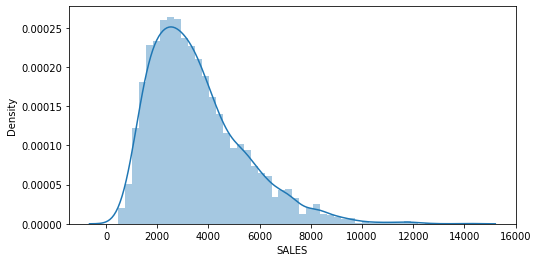

In [ ]:
#Histogram on Profit 
#(kde = kernal density estimation for probability density distribution)
plt.figure(1, figsize=(8,4))
sns.distplot(dataset['SALES'],bins=50, kde = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

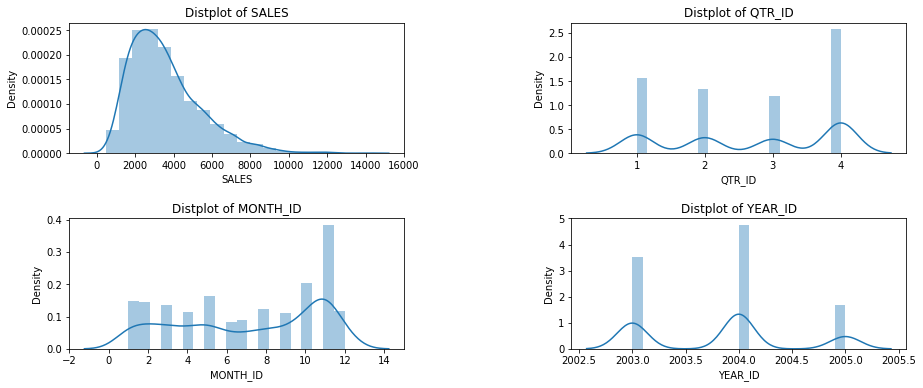

In [ ]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['SALES' , 'QTR_ID' , 'MONTH_ID' , 'YEAR_ID' ,]:
  n += 1
  plt.subplot(2, 2, n)
  plt.subplots_adjust(hspace=0.5, wspace = 0.5)
  sns.distplot(dataset[x] , bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


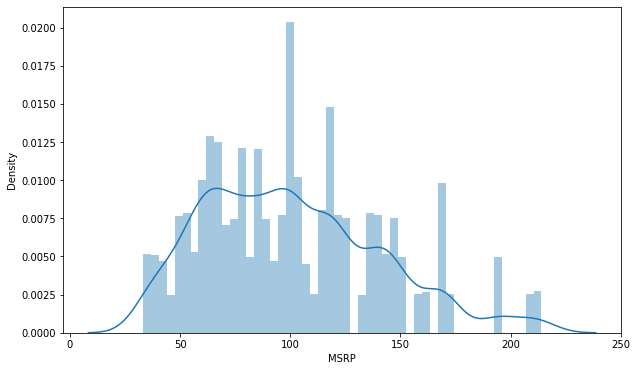

In [ ]:
plt.figure(1, figsize=(10,6))
sns.distplot(dataset['MSRP'],bins=50, kde = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


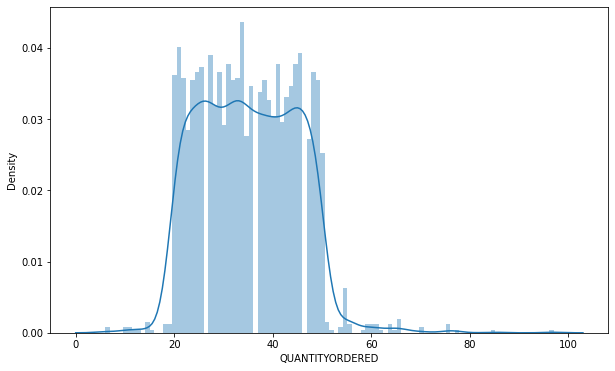

In [ ]:
plt.figure(1, figsize=(10,6))
sns.distplot(dataset['QUANTITYORDERED'],bins=100, kde = True)
plt.show()

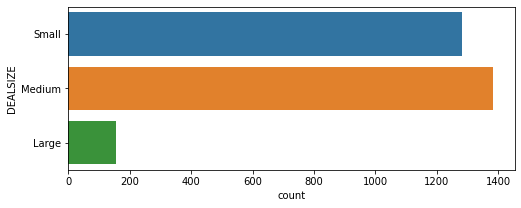

In [ ]:
plt.figure(figsize=(8,3))
sns.countplot(y='DEALSIZE', data=dataset)
plt.show()

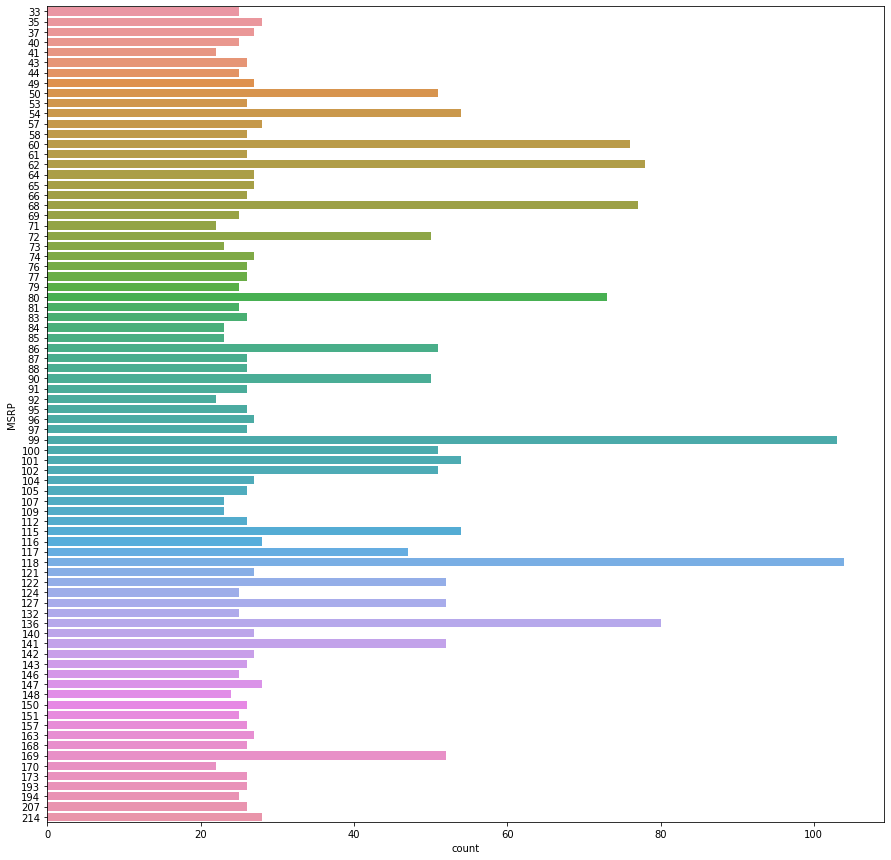

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(y='MSRP', data=dataset)
plt.show()

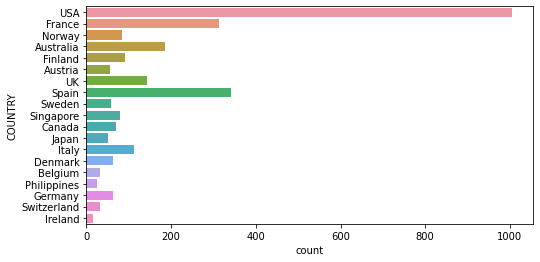

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(y='COUNTRY', data=dataset)
plt.show()

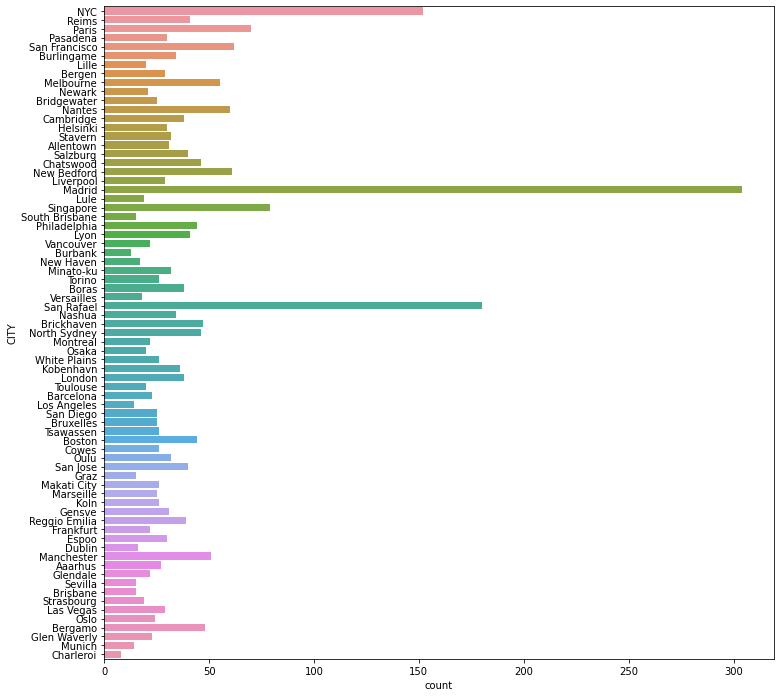

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(y='CITY', data=dataset)
plt.show()

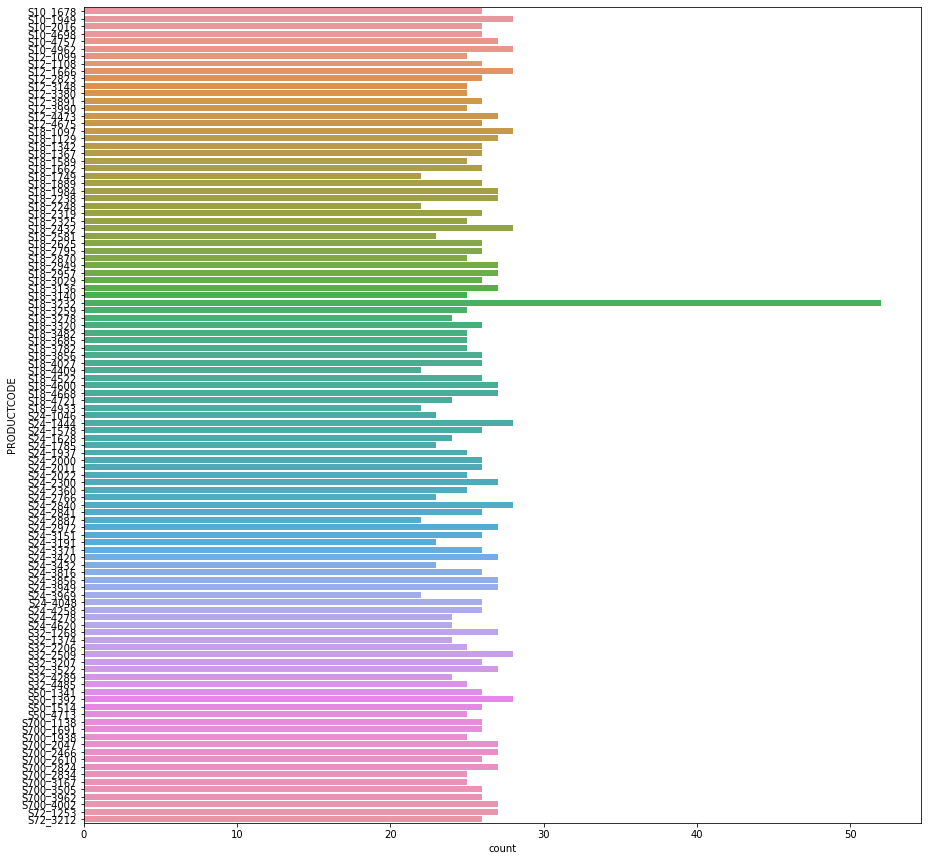

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(y='PRODUCTCODE', data=dataset)
plt.show()

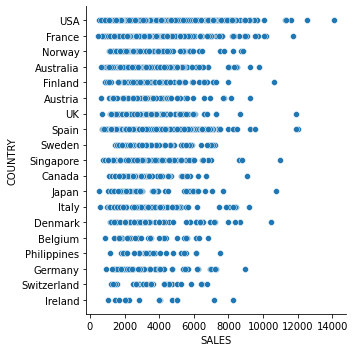

In [ ]:
sns.relplot(x='SALES' , y='COUNTRY', data=dataset)

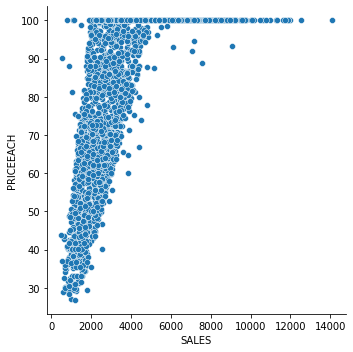

In [ ]:
sns.relplot(x='SALES' , y='PRICEEACH', data=dataset)

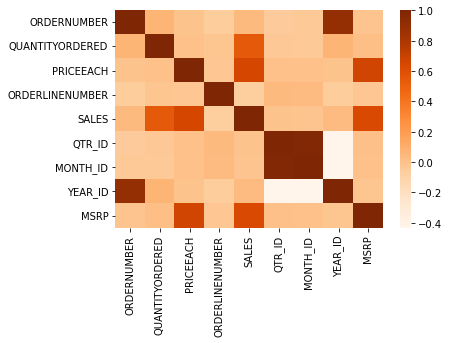

In [ ]:
#EDA on dataset
sns.heatmap(c, annot = False, cmap ='Oranges')
plt.show()

In [ ]:
dataset['DEALSIZE'].replace({'Small':1, 'Medium':2, 'Large':3}, inplace=True)

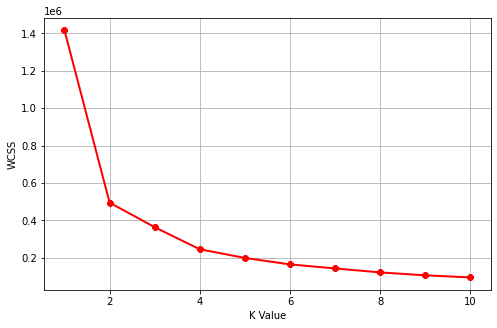

In [ ]:
#sns.pairplot(dataset, diag_kind="hist")
#plt.show()
#WCSS ( Within-Cluster Sum of Square )

x1 = dataset.loc[: ,['PRICEEACH','QUANTITYORDERED']].values
# Import the kmeans algorithm
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init = "k-means++")
  kmeans.fit(x1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red' , marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(x1)
print(label)



[3 2 0 ... 0 2 2]


In [ ]:
print(kmeans.cluster_centers_)

[[97.77038508 43.89410349]
 [46.55608796 34.9537037 ]
 [70.82362671 35.0030349 ]
 [97.82006659 27.10765816]]


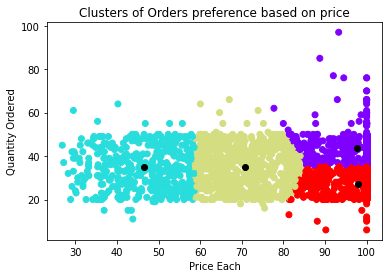

In [ ]:
plt.scatter(x1[:,0] , x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title("Clusters of Orders preference based on price")
plt.xlabel('Price Each')
plt.ylabel("Quantity Ordered")
plt.show()

In [ ]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
dataset['DEALSIZE'].replace({'Small':1, 'Medium':2, 'Large':3}, inplace=True)

In [ ]:
dataset['DEALSIZE']

0       1
1       1
2       2
3       2
4       2
       ..
2818    1
2819    2
2820    2
2821    1
2822    2
Name: DEALSIZE, Length: 2823, dtype: int64

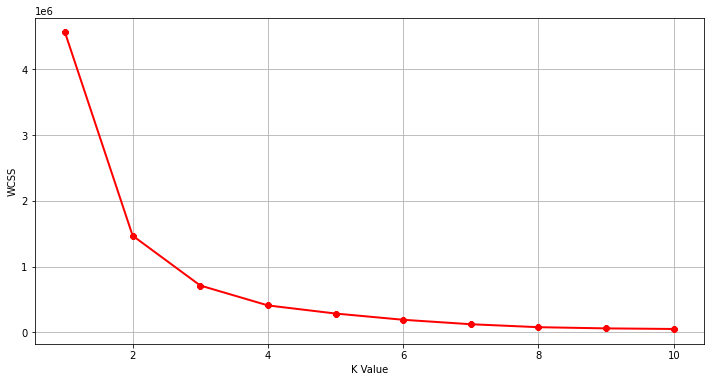

In [ ]:
x2 = dataset.loc[: ,['DEALSIZE','MSRP']].values
# Import the kmeans algorithm
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init = "k-means++")
  kmeans.fit(x2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red' , marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(x2)
print(label)

[0 0 0 ... 2 2 2]


In [ ]:
print(kmeans.cluster_centers_)

[[  1.57627119  92.35254237]
 [  2.23239437 179.99647887]
 [  1.18878719  57.40961098]
 [  1.86282051 129.86282051]]


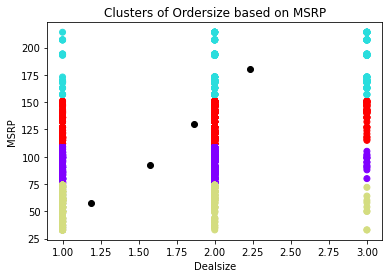

In [ ]:
plt.scatter(x2[:,0] , x2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title("Clusters of Ordersize based on MSRP")
plt.xlabel('Dealsize')
plt.ylabel("MSRP")
plt.show()

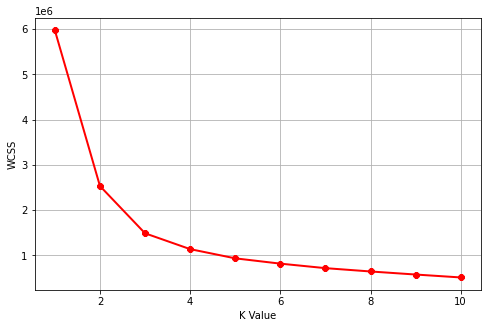

In [ ]:
x3 = dataset.loc[: ,['QUANTITYORDERED','PRICEEACH','MSRP']].values
# Import the kmeans algorithm
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init = "k-means++")
  kmeans.fit(x3)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red' , marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(x3)
print(label)

[0 0 0 ... 0 1 1]


In [ ]:
print(kmeans.cluster_centers_)

[[ 34.92715921  89.88277836  89.72632674]
 [ 34.86375     57.7289125   57.47125   ]
 [ 35.63753213  97.52224936 129.81619537]
 [ 34.80633803  97.65943662 179.99647887]]


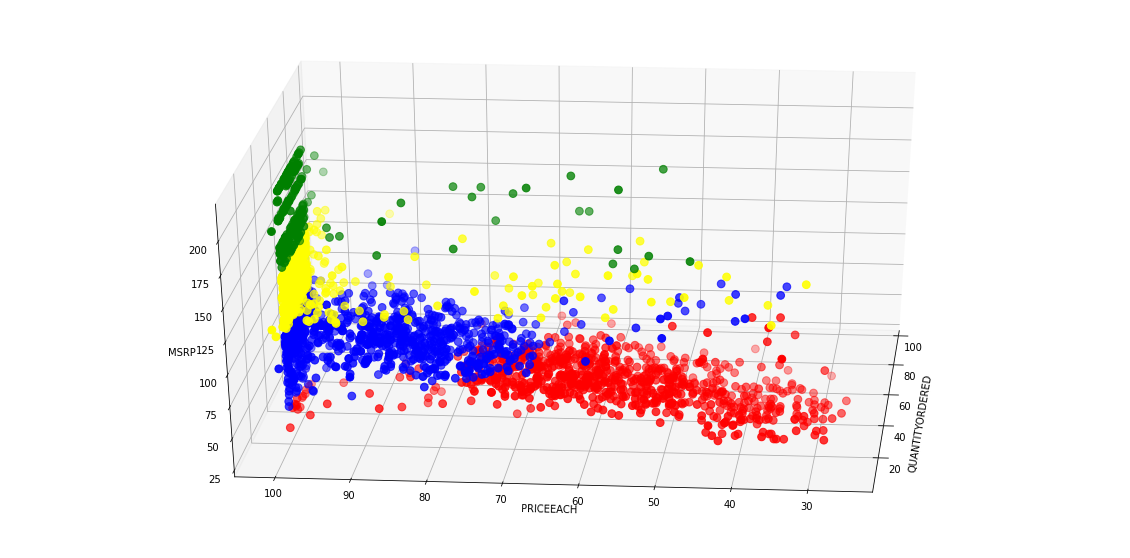

In [ ]:
clusters = kmeans.fit_predict(x3)
dataset["label"] = clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset.QUANTITYORDERED[dataset.label == 0], dataset["PRICEEACH"][dataset.label == 0], dataset["MSRP"][dataset.label == 0], c='blue', s=60)
ax.scatter(dataset.QUANTITYORDERED[dataset.label == 1], dataset["PRICEEACH"][dataset.label == 1], dataset["MSRP"][dataset.label == 1], c='red', s=60)
ax.scatter(dataset.QUANTITYORDERED[dataset.label == 2], dataset["PRICEEACH"][dataset.label == 2], dataset["MSRP"][dataset.label == 2], c='green', s=60)
ax.scatter(dataset.QUANTITYORDERED[dataset.label == 3], dataset["PRICEEACH"][dataset.label == 3], dataset["MSRP"][dataset.label == 3], c='yellow', s=60)
ax.view_init(30,185)

plt.xlabel("QUANTITYORDERED")
plt.ylabel("PRICEEACH")
ax.set_zlabel("MSRP")

plt.show()
